In [1]:
import pandas as pd
import os
import numpy as np
from google.colab import drive
import warnings
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.stattools as ts
from scipy.stats import genhyperbolic

In [3]:
spreadPath = '/content/drive/MyDrive/Colab Notebooks/Independent project_2023 Summer/spreadData'
spreadFiles = os.listdir(spreadPath)
spreadFiles.remove('.ipynb_checkpoints')

In [12]:
warnings.filterwarnings('ignore')
for file in spreadFiles:
  series = pd.read_csv(spreadPath + '/' + file, header=0, index_col=0)
  name = file.split('_')[0]
  adf = ts.adfuller(series, 1)
  test_stat = adf[0]
  five_percent_threshold = adf[4]['1%']
  if test_stat <= five_percent_threshold:
      print(name + " is mean reverting. ")
  else:

      print(name+ " is NOT mean reverting. ")

  print("=================")
  model = AutoReg(series, lags=1).fit()
  resi = model.resid

JBF is mean reverting. 
PEF is mean reverting. 
QXF is mean reverting. 
IPF is mean reverting. 
EHF is mean reverting. 
IIF is mean reverting. 
NAF is mean reverting. 
QWF is mean reverting. 
DBF is mean reverting. 
HCF is mean reverting. 


JBFparameter: 
(-1.5518475803203966, 0.013698272659752098, 0.013698234877982534, -1.4676933048488766e-05, 0.0011091045962391731)


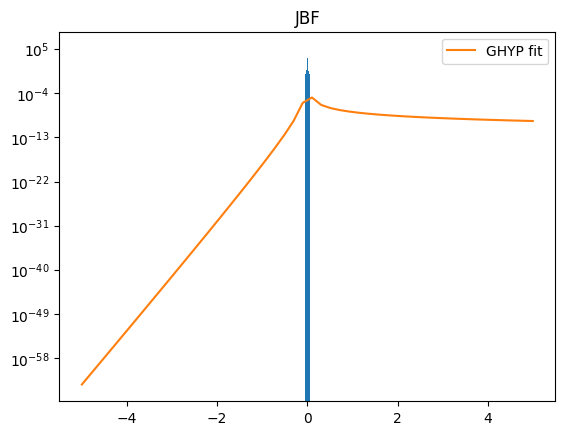

PEFparameter: 
(-1.6459168235063224, 0.10430162794484168, 0.10025699413343585, -3.9339046692818276e-05, 0.0010531843540655234)


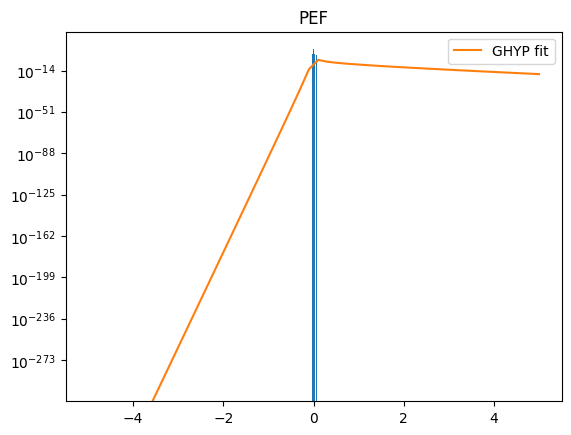

QXFparameter: 
(0.34555827187490407, 0.14252735242581152, 0.0032428489860547817, -1.7747090938624582e-05, 0.0001234300407739255)


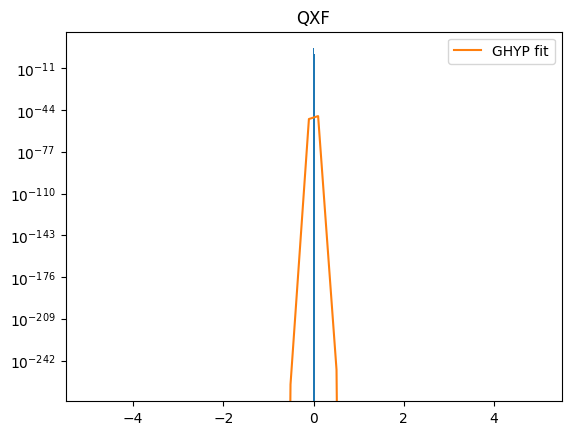

IPFparameter: 
(0.5138949614783419, 0.10252755104484387, 0.002292764506607003, -2.5736587407677863e-05, 0.00010466952481369613)


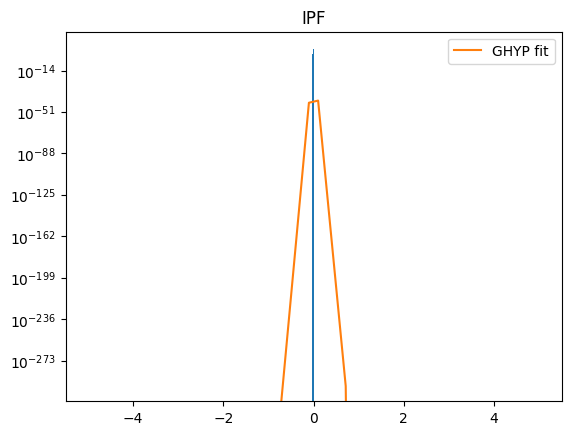

EHFparameter: 
(-0.5795881437414986, 0.01062775003520763, 0.003508798385320722, -8.240085125198977e-05, 0.00040557807395322904)


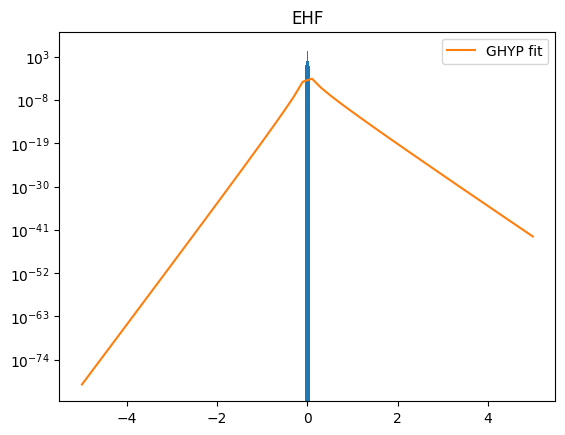

IIFparameter: 
(0.45398702248970557, 4.766950216849394e-10, 3.323295467932315e-11, -3.707634349094473e-05, 5.385147152435271e-13)


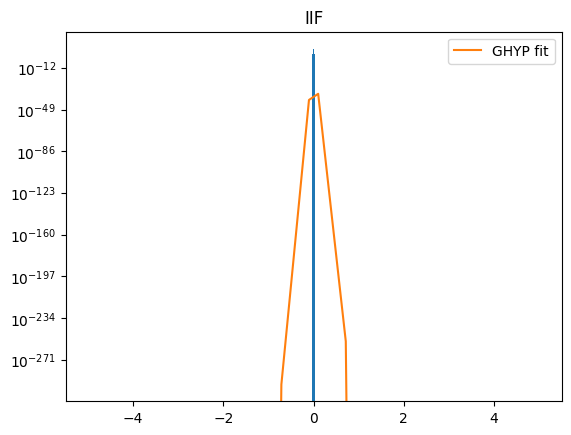

NAFparameter: 
(0.6760205098065659, 0.06978220463987003, 0.001261417019601086, -4.153620458077791e-06, 5.0994530007140504e-05)


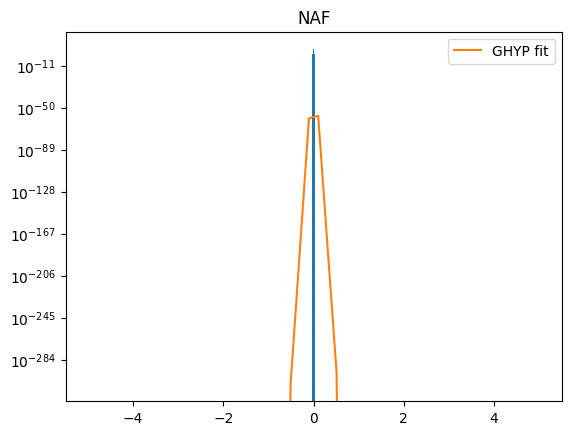

QWFparameter: 
(-1.8026541979438218, 0.07390651770855292, 0.07390651724989508, -5.094954181528456e-05, 0.0011105920973671622)


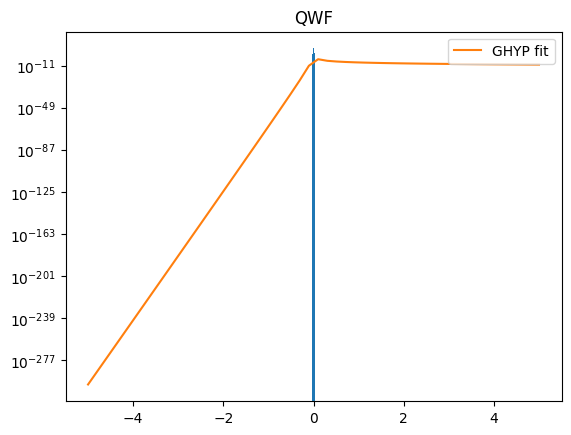

DBFparameter: 
(1.5040957819571381, 5.061267780467279e-07, 3.7246528245707653e-09, -9.666318072942188e-06, 2.202033926879013e-10)


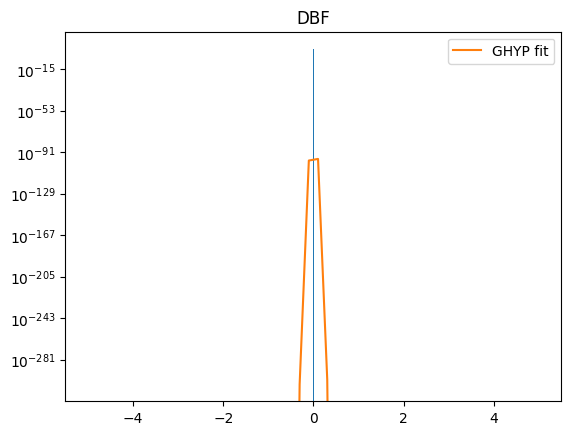

HCFparameter: 
(-1.7884517384702416, 0.0321775469072331, 0.03217754179189902, -2.2090536612331607e-05, 0.000995322661058605)


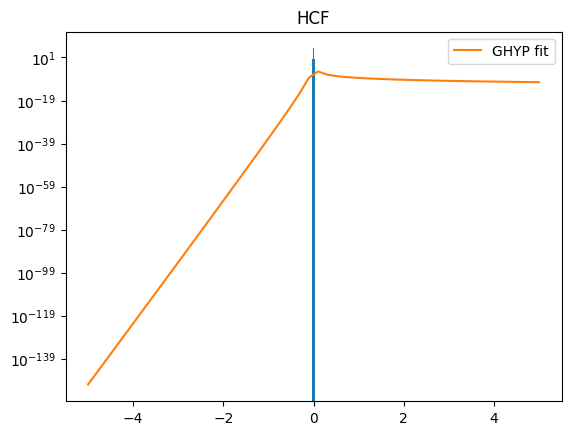

In [37]:
warnings.filterwarnings('ignore')
for file in spreadFiles:
  series = pd.read_csv(spreadPath + '/' + file, header=0, index_col=0)
  name = file.split('_')[0]
  model = AutoReg(series, lags=1).fit()
  resi = model.resid
  # Fit the data to a GHYP distribution
  fit = genhyperbolic.fit(resi)
  print(name + 'parameter: ')
  print(fit)
  x = np.linspace(-5, 5, 50)
  plt.hist(resi, bins=50)
  plt.yscale('log')
  plt.plot(x, genhyperbolic.pdf(x, *fit), label='GHYP fit')
  plt.legend()
  plt.title(name)
  plt.show()


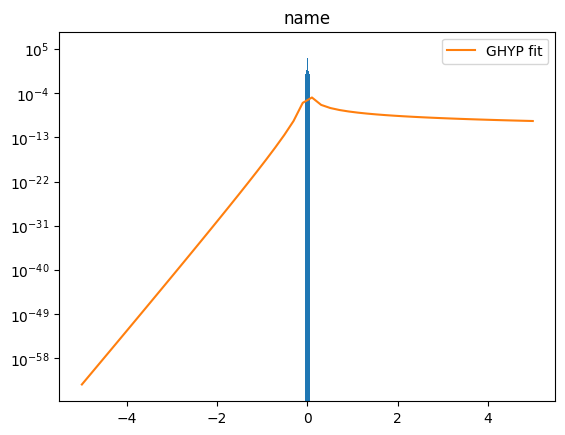

In [34]:
# Plot the empirical and fitted distributions

# Test the goodness of fit
#p_value = genhyperbolic.kstest(series, *fit.params)
#print('KS test p-value:', p_value)